# Playground Series Season 3 Episode 2: Solution Notebook
## Tabular Classification with the Stroke Prediction Dataset

## Prepared by Dwaipayan Mukherjee (Emp. Id.: 2211569)

### About the Project:

The dataset for this project was generated from a deep learning model trained on the Stroke Prediction Dataset. Feature distributions are close to, but not exactly the same, as the original.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


Attribute Information:

1. **id**: unique identifier
2. **gender**: "Male", "Female" or "Other"
3. **age**: age of the patient
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. **ever_married**: "No" or "Yes"
7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. **Residence_type**: "Rural" or "Urban"
9. **avg_glucose_level**: average glucose level in blood
10. **bmi**: body mass index
11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Necessary Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve, auc
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Loading the training, testing, original and submissions data:

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
original = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
5,Female,34.0,0,0,Yes,Private,Urban,84.35,22.2,Unknown,0
6,Female,53.0,0,0,Yes,Private,Rural,88.97,25.3,never smoked,0
7,Male,78.0,0,1,Yes,Self-employed,Rural,75.32,24.8,Unknown,0
8,Female,45.0,0,0,Yes,Private,Rural,107.22,34.1,never smoked,0


In [4]:
test.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
15309,Female,48.0,0,0,Yes,Private,Urban,59.20,32.5,never smoked
15310,Female,39.0,0,0,Yes,Private,Rural,96.26,24.9,Unknown
15311,Female,52.0,0,1,Yes,Govt_job,Rural,103.12,31.6,formerly smoked
15312,Female,12.0,0,0,No,children,Rural,81.59,27.3,Unknown


In [5]:
original.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


### Checking for missing values:

In [6]:
print("\nMissing Values in Training set:\n")
print(train.isna().sum())

print("\n Missing Values in Test set:\n")
print(test.isna().sum())

print("\n Missing Values in Original set:\n ")
print(original.isna().sum())


Missing Values in Training set:

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

 Missing Values in Test set:

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

 Missing Values in Original set:
 
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


There are no missing values in the Train and Test set.

### Understanding the data:

**Summary statistics:**

In [8]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,15304,3,Female,9446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,15304,NaN,NaN,NaN,41.4177,21.4447,0.08,26,43,57,82
hypertension,15304,NaN,NaN,NaN,0.0497256,0.217384,0,0,0,0,1
heart_disease,15304,NaN,NaN,NaN,0.0233272,0.150946,0,0,0,0,1
ever_married,15304,2,Yes,10385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,15304,5,Private,9752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,15304,2,Rural,7664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,15304,NaN,NaN,NaN,89.0399,25.4761,55.22,74.9,85.12,96.98,267.6
bmi,15304,NaN,NaN,NaN,28.1127,6.72232,10.3,23.5,27.6,32,80.1
smoking_status,15304,4,never smoked,6281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,10204,3,Female,6338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10204,NaN,NaN,NaN,41.9207,21.098,0.08,26,43.5,57,82
hypertension,10204,NaN,NaN,NaN,0.0514504,0.220925,0,0,0,0,1
heart_disease,10204,NaN,NaN,NaN,0.0217562,0.145894,0,0,0,0,1
ever_married,10204,2,Yes,7073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,10204,5,Private,6573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,10204,2,Urban,5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,10204,NaN,NaN,NaN,89.1978,25.9144,55.12,75.06,85.07,96.75,267.6
bmi,10204,NaN,NaN,NaN,28.2424,6.73386,11.5,23.7,27.7,32,97.6
smoking_status,10204,4,never smoked,4237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
original.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110,NaN,NaN,NaN,43.2266,22.6126,0.08,25,45,61,82
hypertension,5110,NaN,NaN,NaN,0.097456,0.296607,0,0,0,0,1
heart_disease,5110,NaN,NaN,NaN,0.0540117,0.226063,0,0,0,0,1
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110,NaN,NaN,NaN,106.148,45.2836,55.12,77.245,91.885,114.09,271.74
bmi,4909,NaN,NaN,NaN,28.8932,7.85407,10.3,23.5,28.1,33.1,97.6
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Unique Value Counts in the datasets:**

In [13]:
print(" \n Unique Value Counts in Train data: \n")
for i in train.columns:
    print(f' {i} : {train[i].nunique()}')

print(" \n Unique Value Counts in Test Data: \n")
for i in test.columns:
    print(f' {i} : {test[i].nunique()}')
    
print(" \n Unique Value Counts in Original Data: \n")
for i in original.columns:
    print(f' {i} : {original[i].nunique()}')

 
 Unique Value Counts in Train data: 

 gender : 3
 age : 106
 hypertension : 2
 heart_disease : 2
 ever_married : 2
 work_type : 5
 Residence_type : 2
 avg_glucose_level : 3740
 bmi : 407
 smoking_status : 4
 stroke : 2
 
 Unique Value Counts in Test Data: 

 gender : 3
 age : 106
 hypertension : 2
 heart_disease : 2
 ever_married : 2
 work_type : 5
 Residence_type : 2
 avg_glucose_level : 3265
 bmi : 400
 smoking_status : 4
 
 Unique Value Counts in Original Data: 

 gender : 3
 age : 104
 hypertension : 2
 heart_disease : 2
 ever_married : 2
 work_type : 5
 Residence_type : 2
 avg_glucose_level : 3979
 bmi : 418
 smoking_status : 4
 stroke : 2


**Unique Values of Categorical Variables:**

In [15]:
## Categorical Variables:
cat_col = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

print("\n Unique Values of Categorical Variables in Train data: \n")
for i in cat_col:
    print(f' {i} : {train[i].unique()}')
    
print("\n Unique Values of Categorical Variables in Test data: \n")
for i in ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']:
    print(f' {i} : {test[i].unique()}')

print("\n Unique Values of Categorical Variables in Original data: \n")
for i in cat_col:
    print(f' {i} : {original[i].unique()}')


 Unique Values of Categorical Variables in Train data: 

 gender : ['Male' 'Female' 'Other']
 hypertension : [0 1]
 heart_disease : [0 1]
 ever_married : ['Yes' 'No']
 work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
 Residence_type : ['Urban' 'Rural']
 smoking_status : ['never smoked' 'formerly smoked' 'Unknown' 'smokes']
 stroke : [0 1]

 Unique Values of Categorical Variables in Test data: 

 gender : ['Female' 'Male' 'Other']
 hypertension : [0 1]
 heart_disease : [0 1]
 ever_married : ['Yes' 'No']
 work_type : ['Private' 'children' 'Govt_job' 'Self-employed' 'Never_worked']
 Residence_type : ['Rural' 'Urban']
 smoking_status : ['Unknown' 'smokes' 'never smoked' 'formerly smoked']

 Unique Values of Categorical Variables in Original data: 

 gender : ['Male' 'Female' 'Other']
 hypertension : [0 1]
 heart_disease : [1 0]
 ever_married : ['Yes' 'No']
 work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
 Residence_type : ['Urban' '

### Exploratory Data Analysis:

([<matplotlib.patches.Wedge at 0x2452e6c4760>,
 [Text(-1.0871361453364168, 0.16773491438301516, '0: No Finding'),
  Text(1.087136143373357, -0.1677349271061446, '1: Stroke')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.592983350930922, -0.0914917784215334, '4.9%')])

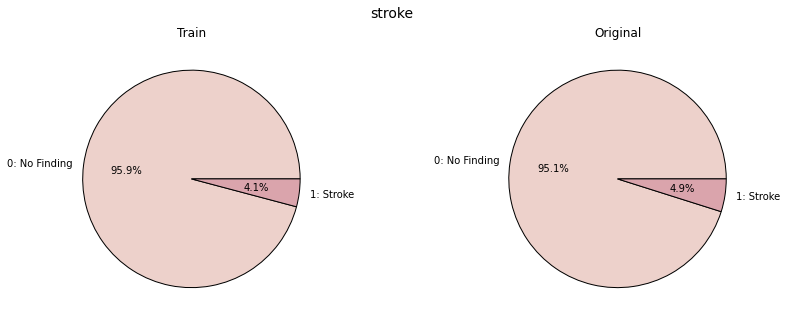

In [17]:
# color
colors = sns.cubehelix_palette()

# figure, axes
fig, ax = plt.subplots(1, 2, figsize=(14,5))
# figure title
fig.suptitle('stroke', fontsize=14)

# train / original Stroke differences
ax[0].set_title('Train')
ax[1].set_title('Original')
plot_data_train = train['stroke'].value_counts()
plot_data_original = original['stroke'].value_counts()
plot_labels_train = plot_data_train.rename(index={0:'0: No Finding', 1:'1: Stroke'}).index
plot_labels_original = plot_data_original.rename(index={0:'0: No Finding', 1:'1: Stroke'}).index
ax[0].pie(plot_data_train, labels=plot_labels_train, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))
ax[1].pie(plot_data_original, labels=plot_labels_original, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))

The Train dataset represents the Original dataset well.

Now I plot the percentage of each categories of all the categorical column in the Train, Test and Original dataset and also the likelihood of a stroke according to these categories:

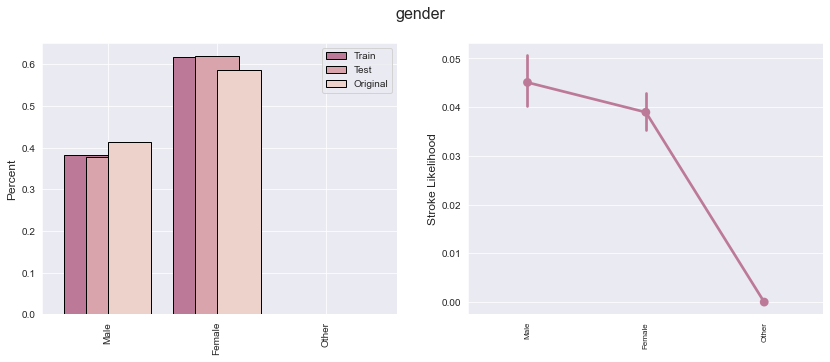

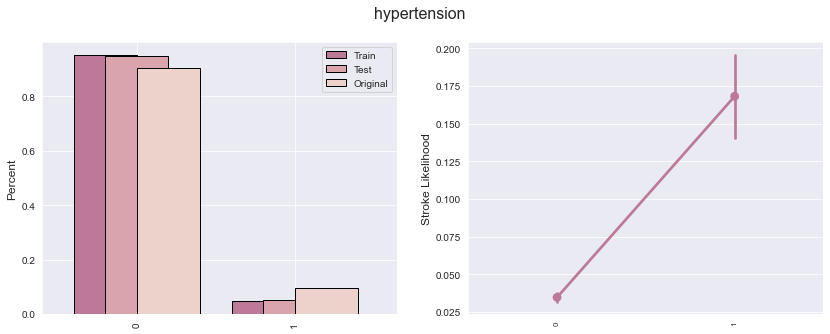

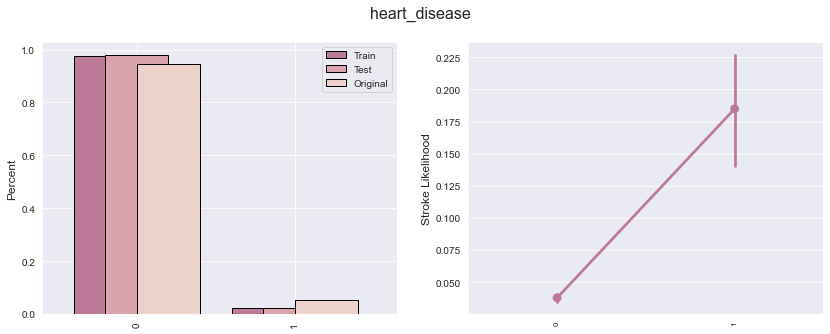

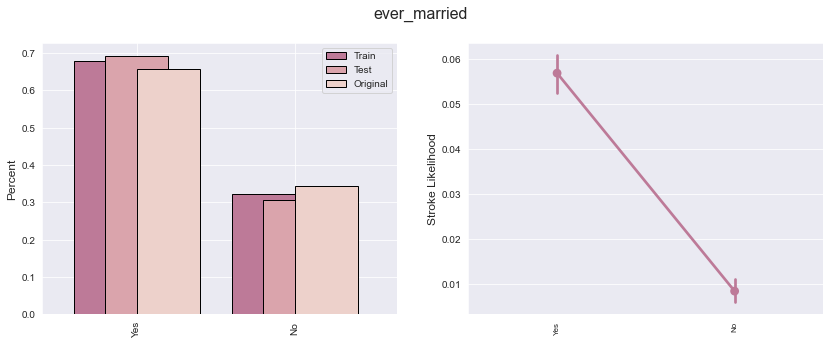

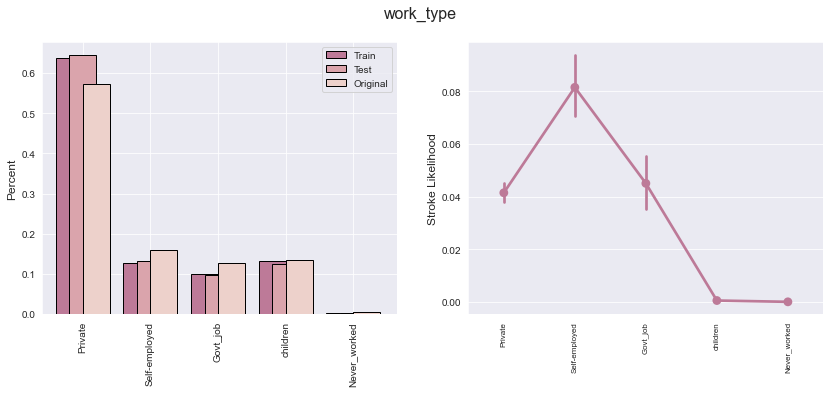

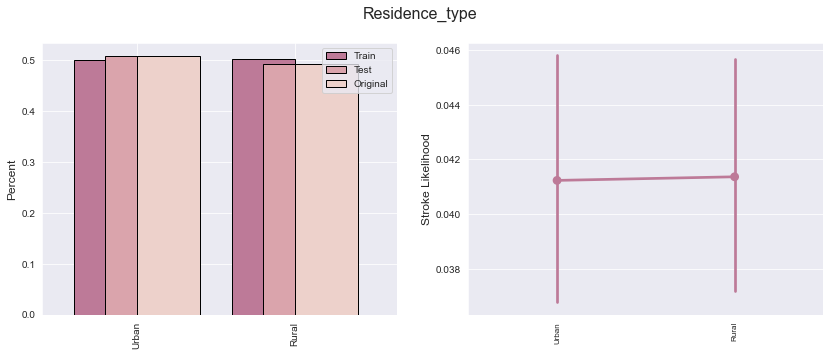

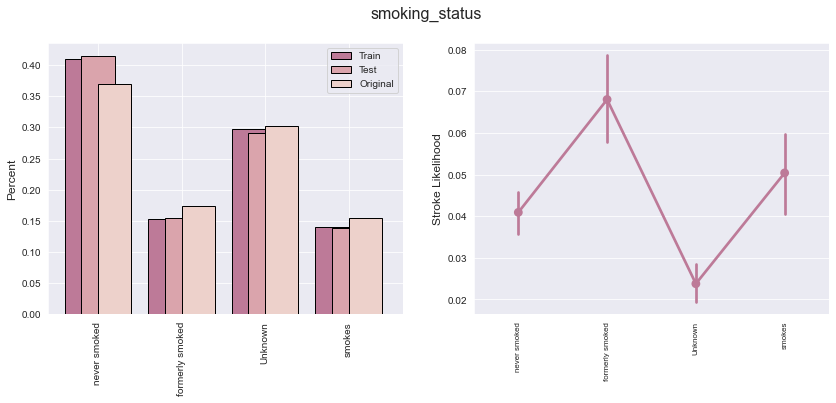

In [20]:
## Categorical Variables:
cat_col = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

for i in cat_col:

    # xticks
    xticks_train = list(train[i].unique())
    xticks_test = list(test[i].unique())
    xticks_original = list(original[i].unique())
    
    # merge xticks_train, xticks_test, xticks_original
    xticks = list(OrderedDict.fromkeys(xticks_train + xticks_test + xticks_original))
    if all([str(item).isdigit() for item in xticks]): xticks.sort()
    
    # figure, axes
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    # figure title
    fig.suptitle(i, fontsize=16)
    
    # train / test / original differences
    pct_train = train[i].value_counts(normalize=True).reindex(xticks)
    pct_test = test[i].value_counts(normalize=True).reindex(xticks)
    pct_original = original[i].value_counts(normalize=True).reindex(xticks)
    pct_train.plot(kind='bar', align='edge', width=-0.4, ax=ax[0], color=colors[2], edgecolor='black')
    pct_test.plot(kind='bar', align='center', width=0.4, ax=ax[0], color=colors[1], edgecolor='black')
    pct_original.plot(kind='bar', align='edge', width=0.4, ax=ax[0], color=colors[0], edgecolor='black')
    ax[0].set_xlim(-0.6) 
    ax[0].set_ylabel('Percent', fontsize=12)
    ax[0].legend(['Train', 'Test', 'Original'])
    
    # stroke likelihood
    sns.pointplot(data=train, x=i, y='stroke', color=colors[2], ax=ax[1])
    ax[1].tick_params(axis='x', labelsize=8, rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Stroke Likelihood', fontsize = 12)

***Inference of this EDA: (based on the Train data)***

1. `Gender`: Males have a higher likelihood of a stroke than females. Others have zero likelihood since they are not in the dataset.
2. `Hypertension`: only a small fraction of the population has hypertension. People having hypertension have a higher likelihood of having a stroke.
3. `heart_disease`: Only a very small portion of the population has heart disease. People having heart disease have a higher risk of stroke.
4. `ever_married`: People who are ever married have a higher likelihood of experiencing a stroke.
5. `work_type`: I find that fraction of people working in Private is the most in the population, while the fraction who have never worked is the least. People who are self-employed have the highest likelihood of stroke, followed by people working in government jobs and private, whike children and those who never worked have zero likelihood of stroke.
6. `residence_type`: Fraction of people living in rural and urban areas are more or less same and the likelihood of the rural people experiencing a stroke is more or less same as those living in urban areas. This variable does not give us much information regarding likelihood of stroke. Stroke is more or less equally likely between people living in rural and urban residence.
7. `smoking_status`: People who formerly smoked have the highest likelihood of stroke, followed by the people who smoke, followed by people who never smoked and the least likelihood is those of the unknown category.

Here I plot the distributions of the continuous variables for the Train, Test and Original dataset and also the distribution (using a boxplot) of these continuous variables with respect to people having stroke and not having stroke:

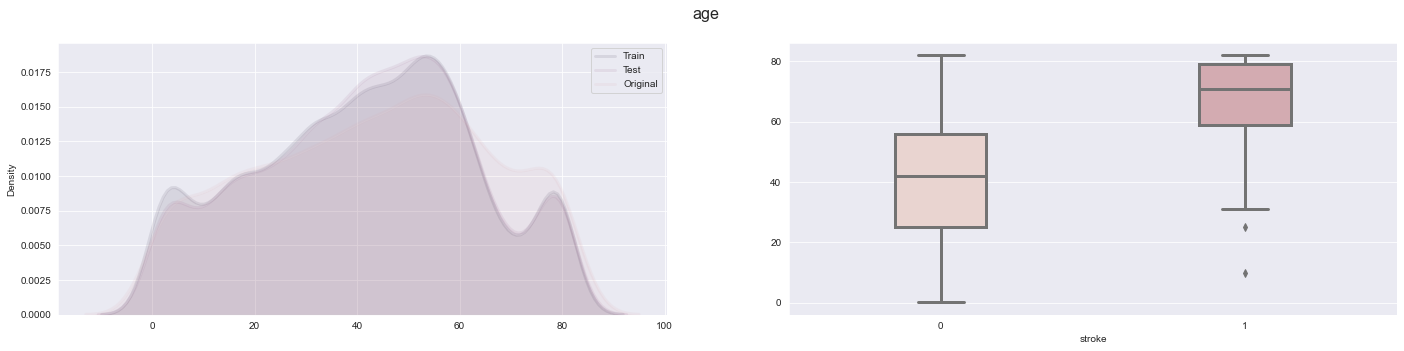

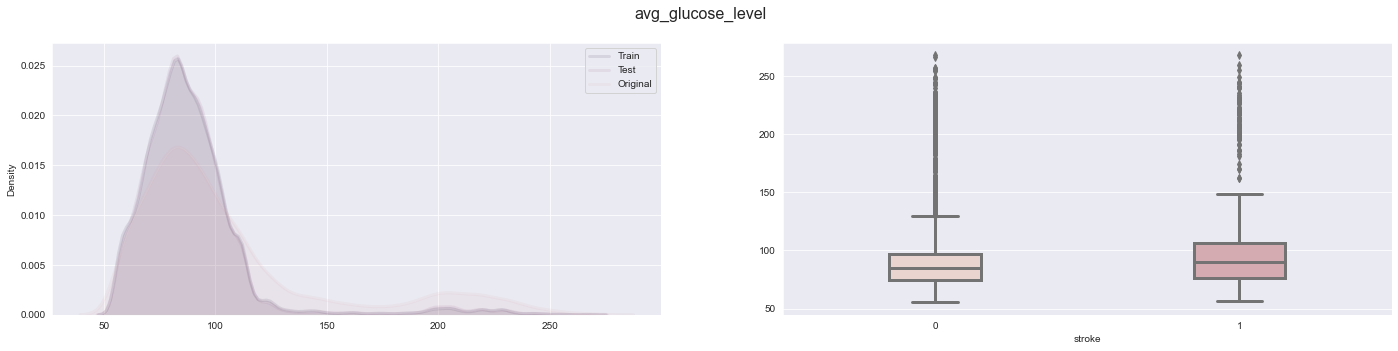

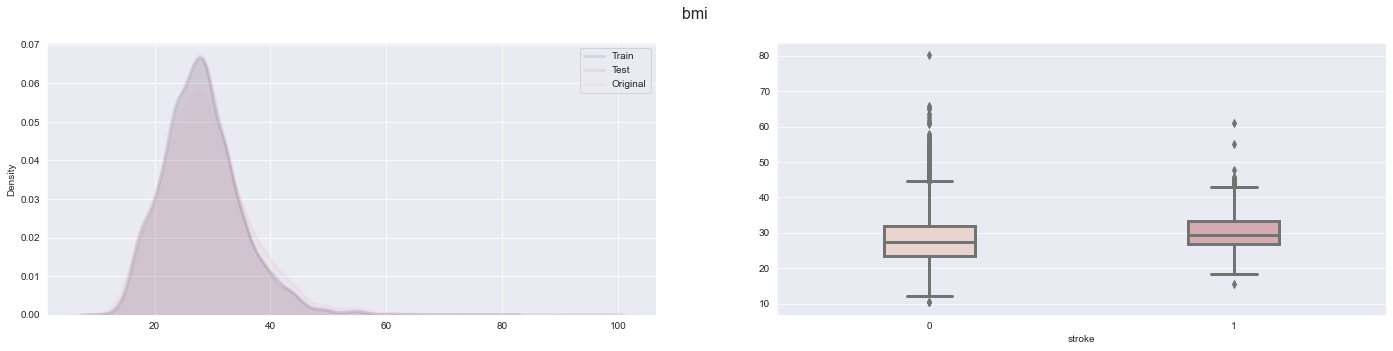

In [26]:
# continuous variables
cont_col = ['age', 'avg_glucose_level', 'bmi']

for i in cont_col:
    
    # figure, axes
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(1, 2, figsize=(24,5))
    # figure title
    fig.suptitle(i, fontsize=16)
    
    # train / test / original differences
    sns.kdeplot(train[i], shade=True, color=colors[5], ax=ax[0], label='Train', alpha=0.1, linewidth=3)
    sns.kdeplot(test[i], shade=True, color=colors[3], ax=ax[0], label='Test', alpha=0.1, linewidth=3)
    sns.kdeplot(original[i], shade=True, color=colors[1], ax=ax[0], label='Original', alpha=0.1, linewidth=3)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Density')
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles, labels)
    
   
    # boxplot
    sns.boxplot(y=i, x='stroke', data=train, width=0.3, ax=ax[1], palette=colors, linewidth=3)
    ax[1].set_xlabel('stroke')
    ax[1].set_ylabel('')

***Inferences from this EDA: (based on the Train dataset):***
1. `age`: The median age of people who have experienced strokes is higher than the median age of those who have not.
2. `avg_glucose_level`: There is very insignificant difference between the median average glucose level of the people who have experienced stroke and those who have not. So, the variable `avg_glucose_level` does not significantly explain who will have stroke and who will not.
3. `bmi`: There is again very insignificant difference between the median values of `bmi` between people who had stroke and who did not. So, again, the variable `bmi` does not significantly explain who will have stroke and who will not.

**Correlation Matrix:**

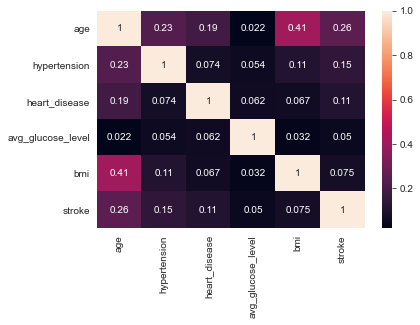

In [28]:
correlation_matrix = train.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)

### Feature Engineering:

1. I replace the Other category in the `gender` column by the Female category.
2. Since there is no visible explanatory relationship between `bmi` and `stroke`, I create two new columns, namely `morbidity` and `obesity`:
    * `morbidity` equals 1 if `bmi` > 40, and 0 otherwise
    * `obesity` equals 1 if `bmi` > 30, and 0 otherwise
3. Since `avg_glucose_level` and `bmi` show no direct effect on `stroke`, I have created a new column named `risk_factors` that uses a relationship between `avg_glusoce_level`,`bmi`, `age`, `hypertension`, `heart_disease` and `smoking_status` to judge `stroke`.

In [29]:
## First on the training data:

## Point 1.
train.gender.replace('Other', 'Female', inplace = True)

## Point 2.
train['morbidity'] = np.where(train.bmi > 40, 1, 0)
train['obesity'] = np.where(train.bmi > 30, 1, 0)

## Point 3.
train['risk_factors'] = train[['avg_glucose_level', 'age', 'bmi', 'hypertension', 'heart_disease', 'smoking_status']].apply(lambda x: \
    0 + (1 if x.avg_glucose_level > 99 else 0) + \
    (1 if x.age > 45 else 0) + (1 if x.bmi > 24.99 else 0) + \
    (1 if x.hypertension == 1 else 0) + \
    (1 if x.heart_disease == 1 else 0) + \
    (1 if x.smoking_status in ['formerly smoked', 'smokes'] else 0),
    axis=1)

In [30]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,morbidity,obesity,risk_factors
id,,,,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0,0,1,1
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0,0,0,1
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0,1,1,2
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0,0,0,2
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0,0,0,1


In [31]:
## Now on the test data:

## Point 1.
test.gender.replace('Other', 'Female', inplace = True)

## Point 2.
test['morbidity'] = np.where(test.bmi > 40, 1, 0)
test['obesity'] = np.where(test.bmi > 30, 1, 0)

## Point 3.
test['risk_factors'] = test[['avg_glucose_level', 'age', 'bmi', 'hypertension', 'heart_disease', 'smoking_status']].apply(lambda x: \
    0 + (1 if x.avg_glucose_level > 99 else 0) + \
    (1 if x.age > 45 else 0) + (1 if x.bmi > 24.99 else 0) + \
    (1 if x.hypertension == 1 else 0) + \
    (1 if x.heart_disease == 1 else 0) + \
    (1 if x.smoking_status in ['formerly smoked', 'smokes'] else 0),
    axis=1)

In [32]:
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,morbidity,obesity,risk_factors
id,,,,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown,0,1,2
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown,0,0,3
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown,0,0,1
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes,1,1,3
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes,0,1,3


### Preparation of data:

We need to encode the categorical variables for building our model:

The encoding is as follows:
* `gender`: 0 if `Female`, 1 if `Male`
 
 
* `ever_married`: 0 if `No`, 1 if `Yes`
 
 
* `work_type`: 0 if `Never_worked`, 1 if `Children`, 2 if `Private`, 3 if `Govt_job`, 4 if `Self-employed`
 
 
* `smoking_status`: 0 if `Unknown`, 1 if `never smoked`, 2 if `smokes`, 3 if `formerly smoked`

In [34]:
## Train dataset:
train['gender'] = train['gender'].map({'Female' : 0, 'Male' : 1})
train['ever_married'] = train['ever_married'].map({'No' : 0, 'Yes' : 1})
train['work_type'] = train['work_type'].map({'Never_worked' : 0, 'children' : 1, 'Private' : 2, 'Govt_job' : 3, 'Self-employed' : 4})
train['smoking_status'] = train['smoking_status'].map({'Unknown' : 0, 'never smoked' : 1, 'smokes' : 2, 'formerly smoked' : 3})

## Test dataset:
test['gender'] = test['gender'].map({'Female' : 0, 'Male' : 1})
test['ever_married'] = test['ever_married'].map({'No' : 0, 'Yes' : 1})
test['work_type'] = test['work_type'].map({'Never_worked' : 0, 'children' : 1, 'Private' : 2, 'Govt_job' : 3, 'Self-employed' : 4})
test['smoking_status'] = test['smoking_status'].map({'Unknown' : 0, 'never smoked' : 1, 'smokes' : 2, 'formerly smoked' : 3})

I have got rid of `Residence_type` variable.

In [35]:
train.drop(['Residence_type'], axis = 1, inplace = True)
test.drop(['Residence_type'], axis = 1, inplace = True)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  int64  
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  int64  
 5   work_type          15304 non-null  int64  
 6   avg_glucose_level  15304 non-null  float64
 7   bmi                15304 non-null  float64
 8   smoking_status     15304 non-null  int64  
 9   stroke             15304 non-null  int64  
 10  morbidity          15304 non-null  int32  
 11  obesity            15304 non-null  int32  
 12  risk_factors       15304 non-null  int64  
dtypes: float64(3), int32(2), int64(8)
memory usage: 2.1 MB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10204 entries, 15304 to 25507
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             10204 non-null  int64  
 1   age                10204 non-null  float64
 2   hypertension       10204 non-null  int64  
 3   heart_disease      10204 non-null  int64  
 4   ever_married       10204 non-null  int64  
 5   work_type          10204 non-null  int64  
 6   avg_glucose_level  10204 non-null  float64
 7   bmi                10204 non-null  float64
 8   smoking_status     10204 non-null  int64  
 9   morbidity          10204 non-null  int32  
 10  obesity            10204 non-null  int32  
 11  risk_factors       10204 non-null  int64  
dtypes: float64(3), int32(2), int64(7)
memory usage: 956.6 KB


### Modelling:

I first separate out the target variable and the predictors:

In [39]:
X = train.drop(['stroke'], axis=1).copy()
y = train['stroke'].copy()
X_test = test.copy()

**Random Forest Classifier:**

I use a Random Forest Classifier model first, with a 5-fold Cross Validation. Here I am using Stratified K fold since the data is imbalanced.

fold : 1
score : 0.8494145642356886
----------------------------------------
fold : 2
score : 0.8642708417836186
----------------------------------------
fold : 3
score : 0.8740882082991159
----------------------------------------
fold : 4
score : 0.8639947613910225
----------------------------------------
fold : 5
score : 0.8651415803767543
----------------------------------------
Score over 5-folds: 0.86338199121724


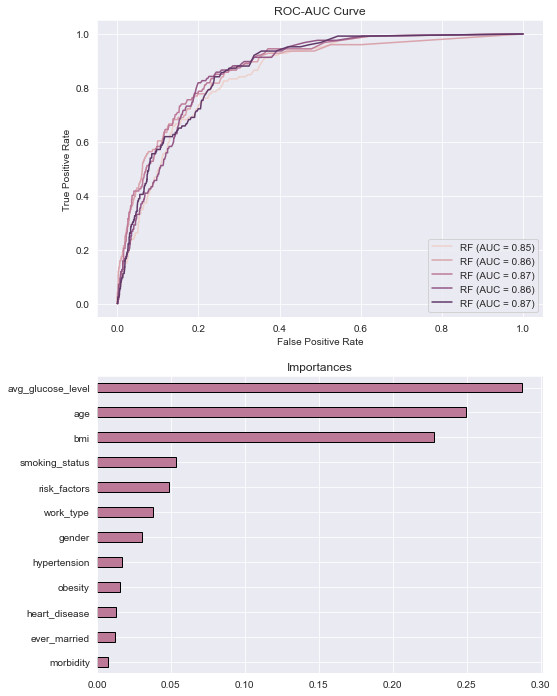

In [60]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

rf_cv_scores = []
rf_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    ## Model:
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
    rf.fit(X_train, y_train)
    
    ## Importances:
    rf_importances.append(rf.feature_importances_)
    
    ## Prediction and Evaluation:
    rf_pred = rf.predict_proba(X_valid)[:, 1]
    rf_cv_scores.append(roc_auc_score(y_valid, rf_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, rf_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'RF')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {rf_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(rf_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(rf_cv_scores)}')

**XGBoost Classifier:**

fold : 1
score : 0.882285497958411
----------------------------------------
fold : 2
score : 0.8870257699899949
----------------------------------------
fold : 3
score : 0.8858375065080055
----------------------------------------
fold : 4
score : 0.8819568566199164
----------------------------------------
fold : 5
score : 0.8899898291513834
----------------------------------------
Score over 5-folds: 0.8854190920455423


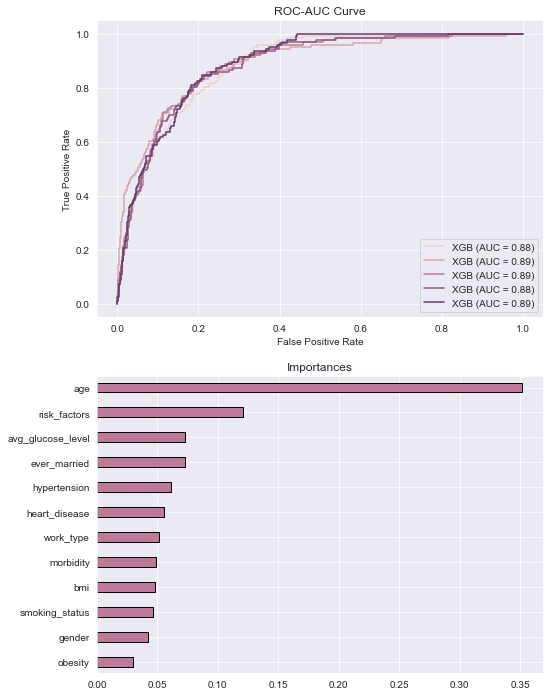

In [59]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

xgb_cv_scores = []
xgb_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    
    ## Model:
    
    xgb_model = XGBClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 1000,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)
    xgb_model.fit(X_train, y_train)
        
    ## Importances:
    xgb_importances.append(xgb_model.feature_importances_)
    
    ## Prediction and Evaluation:
    xgb_pred = xgb_model.predict_proba(X_valid)[:, 1]
    xgb_cv_scores.append(roc_auc_score(y_valid, xgb_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, xgb_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'XGB')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {xgb_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(xgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(xgb_cv_scores)}')

**LightGBM Classifier:**

fold : 1
score : 0.8793055893566966
----------------------------------------
fold : 2
score : 0.8862185987398935
----------------------------------------
fold : 3
score : 0.8816133412771257
----------------------------------------
fold : 4
score : 0.8799360202674054
----------------------------------------
fold : 5
score : 0.8855400828815961
----------------------------------------
Score over 5-folds: 0.8825227265045434


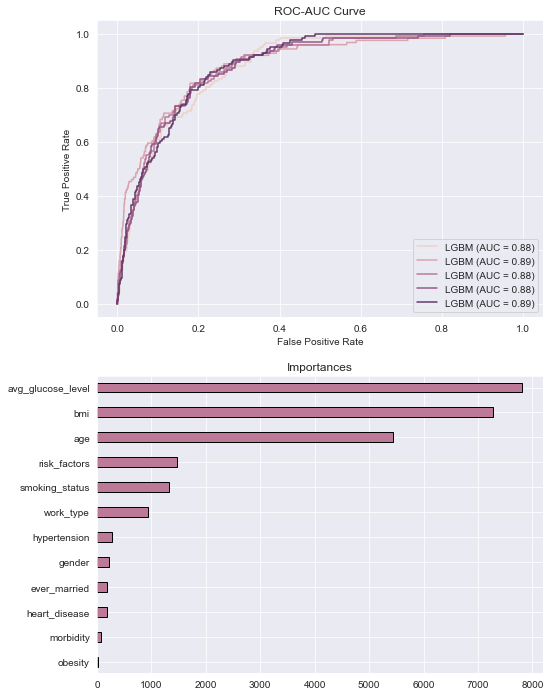

In [57]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

lgb_cv_scores = []
lgb_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    
    ## Model:
    
    lgb_model = LGBMClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 1000,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)
    lgb_model.fit(X_train, y_train)
        
    ## Importances:
    lgb_importances.append(lgb_model.feature_importances_)
    
    ## Prediction and Evaluation:
    lgb_pred = lgb_model.predict_proba(X_valid)[:, 1]
    lgb_cv_scores.append(roc_auc_score(y_valid, lgb_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, lgb_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'LGBM')
    display.plot(color = colors[fold], ax = ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {lgb_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances = pd.DataFrame(lgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

## Total score:
print(f'Score over 5-folds: {np.mean(lgb_cv_scores)}')

Till now, the XGBoost Classifier has given the best results. However, the LightGBM Classifier has also given results almost as good as the XGBoost model.

I will use a combination of the two models: LGBM Classifier and XGBoost Classifier:

fold : 1
score : 0.8813444741894486
----------------------------------------
fold : 2
score : 0.8869311267948407
----------------------------------------
fold : 3
score : 0.8847881744843246
----------------------------------------
fold : 4
score : 0.8815972389954323
----------------------------------------
fold : 5
score : 0.8887319981389512
----------------------------------------
Score over 5-folds: 0.8846786025205994


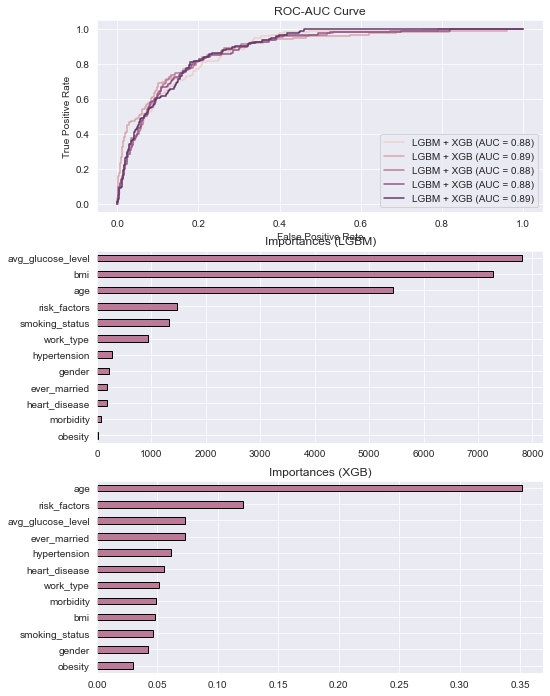

In [68]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(3, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances (LGBM)')
ax[2].set_title('Importances (XGB)')


combine_cv_scores = []
lgb_importances = []
xgb_importances = []


skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, y)):
    
    ## Split into train and validation set:
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    
    ## Model:
    
    lgb_model = LGBMClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 1000,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)
    lgb_model.fit(X_train, y_train)
    
    xgb_model = XGBClassifier(max_depth = 7,
                              learning_rate = 0.01,
                              n_estimators = 1000,
                              subsample = 0.7,
                              colsample_bytree = 0.7,
                              reg_alpha = 3,
                              reg_lambda = 3)
    xgb_model.fit(X_train, y_train)
    
    ## Importances:
    lgb_importances.append(lgb_model.feature_importances_)
    xgb_importances.append(xgb_model.feature_importances_)
        

    
    ## Prediction and Evaluation:
    lgb_pred = lgb_model.predict_proba(X_valid)[:, 1]
    xgb_pred = xgb_model.predict_proba(X_valid)[:, 1]
    combine_pred = 0.4 * lgb_pred + 0.6 * xgb_pred
    combine_cv_scores.append(roc_auc_score(y_valid, combine_pred))
    fpr, tpr, thresholds = roc_curve(y_valid, combine_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'LGBM + XGB')
    display.plot(color = colors[fold], ax=ax[0])
    
    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {combine_cv_scores[-1]}')
    print('----------------------------------------')
    
## Importances:
df_importances_lgb = pd.DataFrame(lgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances_lgb.plot(kind='barh', align='center', width=0.4, ax=ax[1], color=colors[2], edgecolor='black')

df_importances_xgb = pd.DataFrame(xgb_importances, columns = X.columns).apply(np.mean, axis=0).sort_values()
df_importances_xgb.plot(kind='barh', align='center', width=0.4, ax=ax[2], color=colors[2], edgecolor='black')
    
## Total score:
print(f'Score over 5-folds: {np.mean(combine_cv_scores)}')

### Submission:

Since the XGBoost model gave the best result, I choose it for the test set predictions. First I train the XGBoost model on the entire data and then predict for the test data.

In [72]:
## Model:
    
xgb_model = XGBClassifier(max_depth = 7,
                          learning_rate = 0.01,
                          n_estimators = 1000,
                          subsample = 0.7,
                          colsample_bytree = 0.7,
                          reg_alpha = 3,
                          reg_lambda = 3)
xgb_model.fit(X, y)


## Model predictions:

xgb_pred_probs = xgb_model.predict_proba(X_test)[:, 1]


## Final Submission Dataset:

submission['stroke_probability'] = xgb_pred_probs

submission.to_csv('submission.csv', index=False)